# MDS Data Science Application

Thank you for your interest Mercury Data Science! As an applicant for the Data Scientist position, we request that you complete the following tasks outlined in this notebook and submit your results to Melissa Bennett (melissa@mercuryds.com).

Each task is designed to help us understand your technical and problem solving abilities. While we do not probibit the use of external resources when completing this task (e.g. stack overflow, google, etc.), we request that you cite the source of any code you reference online. Plagarism is unacceptable.

Don't hesitate to import from external libraries. In fact, we strongly encourage you to explore ways to engineer and augment the feature set in this dataset. Be creative!

As you develop your code and respond to the prompts below, please communicate your thoughts clearly and concisely through writing and visualizations. 

We look forward to seeing your responses!



## Extract Austin crime data

URL: "https://data.austintexas.gov/api/views/vmn9-3bvu/rows.csv?accessType=DOWNLOAD"

If you're unable to download the file, please let us know. It may have been moved.

In [98]:
# !conda update pandas
import pandas as pd
data=pd.read_csv("Crime_Reports_2018.csv")


In [99]:
data.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20185000070,THEFT,600,N,01/01/2018 05:00:00 PM,01/01/2018,1700,01/01/2018 05:27:00 PM,01/01/2018,1727,...,NaN,N,01/02/2018,23H,Theft,3113952.0,3113952.0,30.266100,-97.744003,"(30.26610034, -97.74400318)"
1,201810989,THEFT OF LICENSE PLATE,614,N,12/30/2017 12:00:00 PM,12/30/2017,1200,01/01/2018 09:03:00 AM,01/01/2018,903,...,NaN,N,01/03/2018,23G,Theft,3131137.0,3131137.0,30.217300,-97.690889,"(30.21729993, -97.69088863)"
2,201810354,DRIVING WHILE INTOX / FELONY,2109,N,01/01/2018 01:36:00 AM,01/01/2018,136,01/01/2018 05:06:00 AM,01/01/2018,506,...,NaN,C,01/01/2018,NaN,NaN,3135794.0,3135794.0,30.433722,-97.670173,"(30.43372229, -97.67017337)"
3,201811106,BURGLARY NON RESIDENCE,502,N,01/01/2018 05:00:00 AM,01/01/2018,500,01/01/2018 11:31:00 AM,01/01/2018,1131,...,NaN,N,02/12/2018,220,Burglary,3103387.0,3103387.0,30.464765,-97.772208,"(30.4647654, -97.77220766)"
4,201811667,AGG ROBBERY/DEADLY WEAPON,300,N,01/01/2018 07:47:00 PM,01/01/2018,1947,01/01/2018 07:47:00 PM,01/01/2018,1947,...,NaN,C,01/03/2018,120,Robbery,3128703.0,3128703.0,30.365829,-97.694539,"(30.36582905, -97.69453919)"



## Exploratory data analysis

Examine the data. Visualize the features, identify outliers, etc. Report your findings and describe any tables and figures you generate.

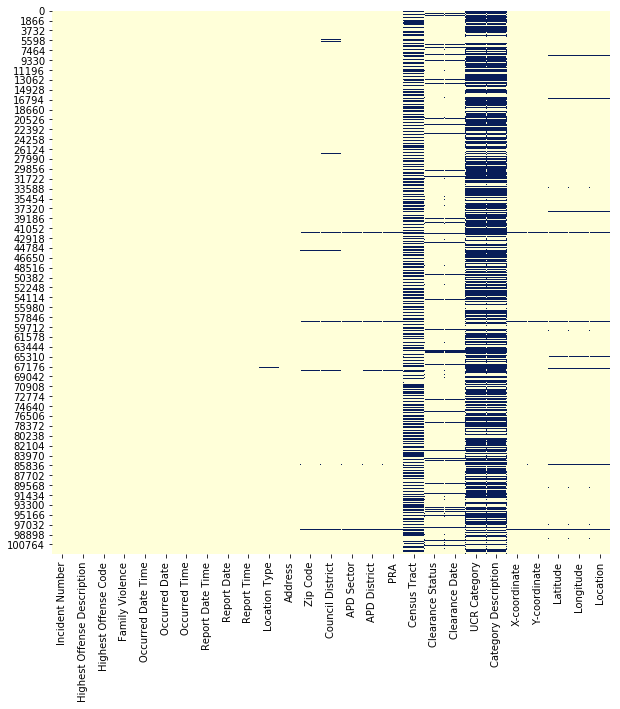

In [100]:
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline
# Let's see how many null elements are contained in the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(), cbar = False, cmap = 'YlGnBu')

Thus from the heatmap, it can be seen that Census tract, UCR Category, and category description have lots of NaN in them. 

In [101]:
data['Category Description']=data['Category Description'].fillna('Misc') ## Make remaining categories as Misc
crimewise_summary=data.groupby(by='Category Description').describe()
print(crimewise_summary)

                     Census Tract                                              \
                            count       mean         std    min    25%    50%   
Category Description                                                            
Aggravated Assault         1222.0  26.048044   36.024601   1.01  17.86  18.49   
Auto Theft                 1387.0  45.101709  455.617707   1.01  16.04  18.34   
Burglary                   3132.0  27.908780  178.317335   1.01  17.13  18.33   
Misc                      35314.0  49.408106  471.538184   1.01  17.38  18.39   
Murder                       15.0  20.216667    2.978997  13.03  18.30  21.06   
Rape                        495.0  23.868465   32.371206   1.01  17.50  18.39   
Robbery                     385.0  21.440494   27.207973   1.02  17.14  18.23   
Theft                     11441.0  34.414237  318.528694   1.01  15.04  18.20   

                                      Council District             ...     \
                         75%   

In [102]:
s = data[['Category Description']]
crime_count = pd.DataFrame(s.groupby('Category Description').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count

,Category Description,counts
0,Misc,65604
1,Theft,26534
2,Burglary,4159
3,Auto Theft,2418
4,Aggravated Assault,2075
5,Robbery,998
6,Rape,796
7,Murder,31


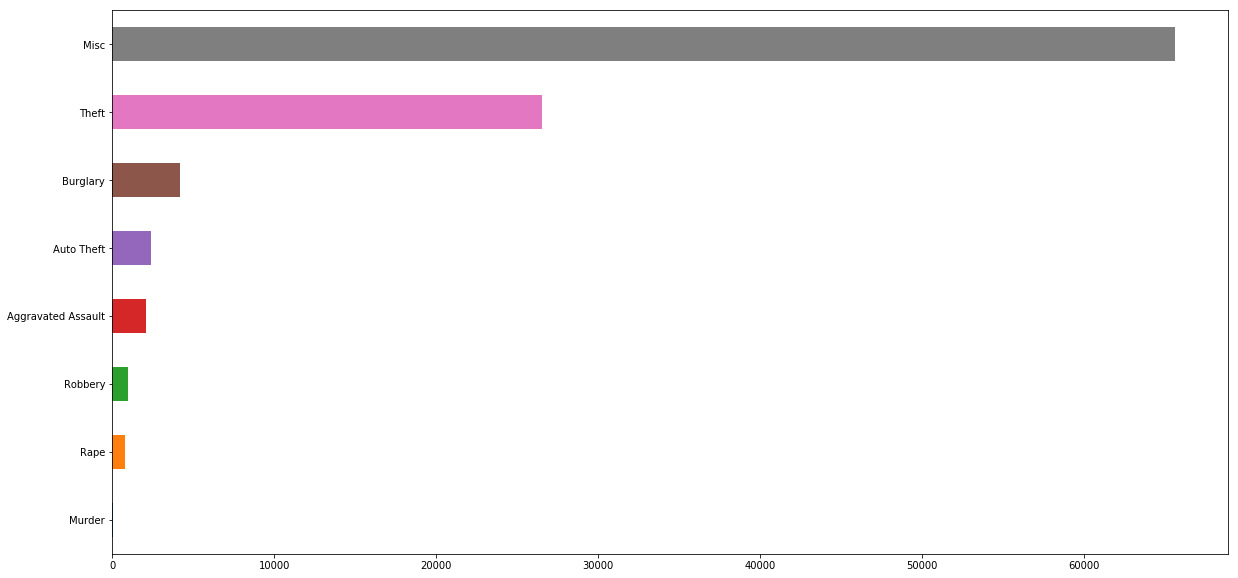

In [103]:
lm=data['Category Description'].value_counts().sort_values()
plt.rcParams["figure.figsize"] = (20,10)
lm.plot.barh(x='lab', y='val')

It is seen that Theft is the most common type of crime followed by Burglary, autotheft, and aggravated assault. 

In [104]:
data['Report Date Time'] =  pd.to_datetime(data['Report Date Time'])
data['Occurred Date Time']=pd.to_datetime(data['Occurred Date Time'])
data['Clearance Date']=pd.to_datetime(data['Clearance Date'])

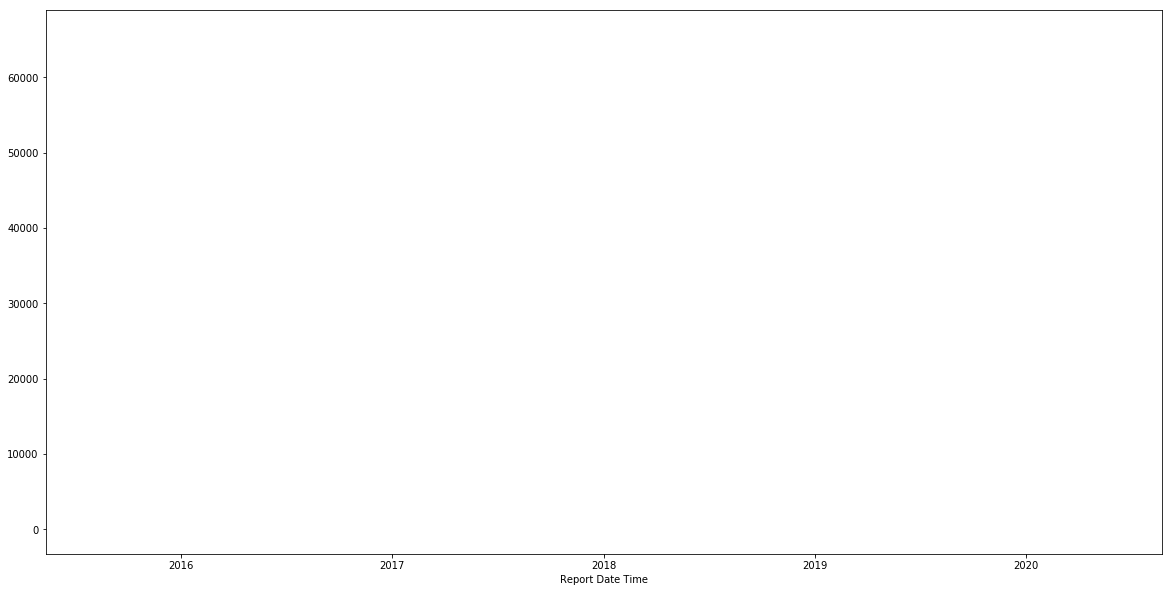

In [105]:
##Yearly
data=data.set_index(['Report Date Time'])
data[data['Category Description']=='Misc']['Category Description'].resample('A').count().plot(label="misc")
data[data['Category Description']=='Theft']['Category Description'].resample('A').count().plot()
data[data['Category Description']=='Burglary']['Category Description'].resample('A').count().plot()
data[data['Category Description']=='Auto Theft']['Category Description'].resample('A').count().plot()
data[data['Category Description']=='Aggravated Assault']['Category Description'].resample('A').count().plot()
data[data['Category Description']=='Robbery']['Category Description'].resample('A').count().plot()
data[data['Category Description']=='Rape']['Category Description'].resample('A').count().plot()
data[data['Category Description']=='Murder']['Category Description'].resample('A').count().plot()



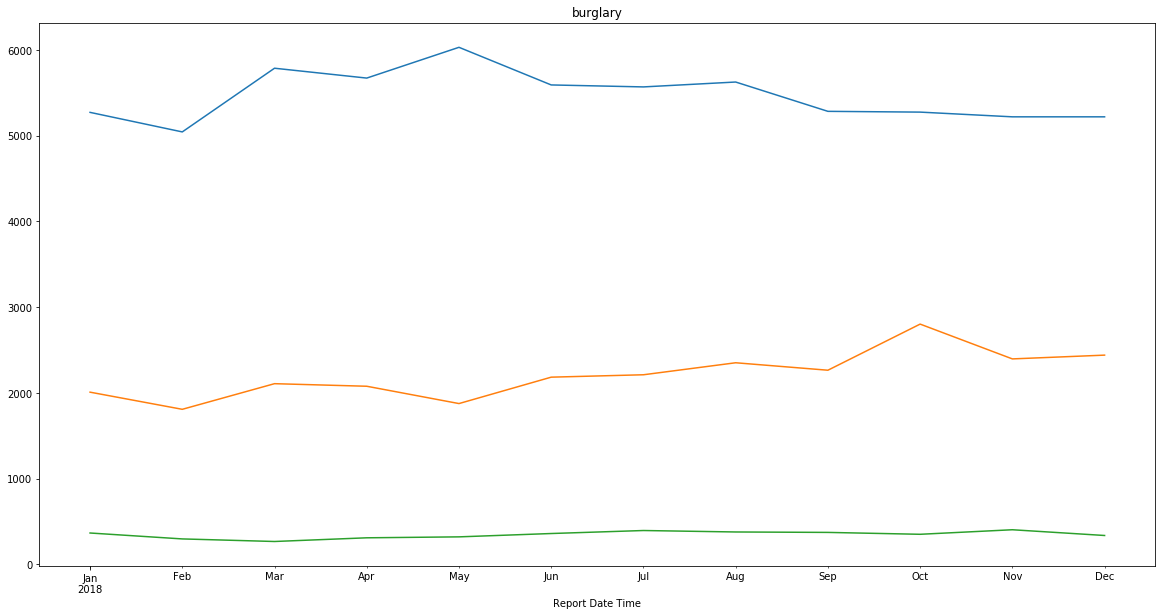

In [106]:
##Monthly
data[data['Category Description']=='Misc']['Category Description'].resample('M').count().plot(title="misc")
data[data['Category Description']=='Theft']['Category Description'].resample('M').count().plot(title="theft")
data[data['Category Description']=='Burglary']['Category Description'].resample('M').count().plot(title='burglary')
# data[data['Category Description']=='Auto Theft']['Category Description'].resample('M').count().plot()
# data[data['Category Description']=='Aggravated Assault']['Category Description'].resample('M').count().plot()
# data[data['Category Description']=='Robbery']['Category Description'].resample('M').count().plot()
# data[data['Category Description']=='Rape']['Category Description'].resample('M').count().plot()
# data[data['Category Description']=='Murder']['Category Description'].resample('M').count().plot()

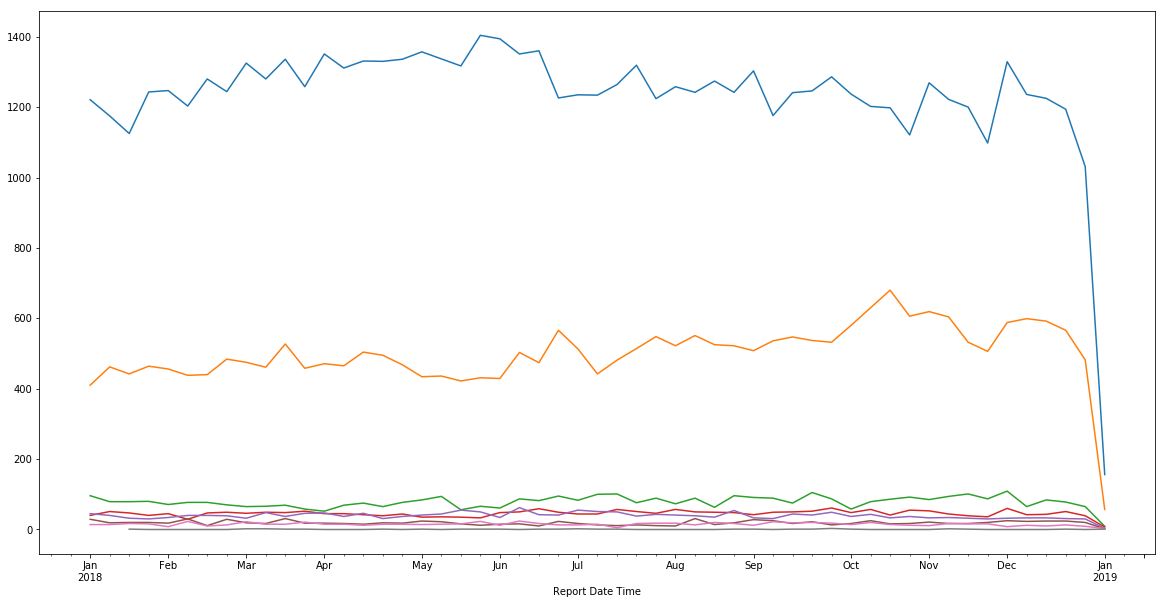

In [107]:
##Weekly
data[data['Category Description']=='Misc']['Category Description'].resample('W').count().plot(label="misc")
data[data['Category Description']=='Theft']['Category Description'].resample('W').count().plot()
data[data['Category Description']=='Burglary']['Category Description'].resample('W').count().plot()
data[data['Category Description']=='Auto Theft']['Category Description'].resample('W').count().plot()
data[data['Category Description']=='Aggravated Assault']['Category Description'].resample('W').count().plot()
data[data['Category Description']=='Robbery']['Category Description'].resample('W').count().plot()
data[data['Category Description']=='Rape']['Category Description'].resample('W').count().plot()
data[data['Category Description']=='Murder']['Category Description'].resample('W').count().plot()


### Geo plotting

In [108]:
# Extract the data we're interested in
lat = data['Latitude'].values
lon = data['Longitude'].values
# data=data.set_index(['Category Description'])
data.index

DatetimeIndex(['2018-01-01 17:27:00', '2018-01-01 09:03:00',
               '2018-01-01 05:06:00', '2018-01-01 11:31:00',
               '2018-01-01 19:47:00', '2018-01-01 23:16:00',
               '2018-01-01 03:03:00', '2018-01-01 04:41:00',
               '2018-01-01 02:42:00', '2018-01-01 16:41:00',
               ...
               '2018-12-31 08:59:00', '2018-12-31 05:05:00',
               '2018-12-31 10:15:00', '2018-12-31 11:09:00',
               '2018-12-31 13:38:00', '2018-12-31 09:01:00',
               '2018-12-31 04:40:00', '2018-12-31 10:07:00',
               '2018-12-31 04:59:00', '2018-12-31 14:13:00'],
              dtype='datetime64[ns]', name='Report Date Time', length=102615, freq=None)

In [109]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=data.index,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');


KeyError: 'PROJ_LIB'

In [ ]:
# Let's drop the outlier for now, since it is skewing our visualization
df.drop(df[df['Y'] == df['Y'].max()].index, inplace=True)

# Assign a color index to each crime category
color_map = dict(zip(crime_category_names, range(len(crime_categories))))

# Draw a scatter plot to show the crimes distribution
fig = plt.figure(figsize=(20,20))
plt.scatter(df.X, df.Y, c=df.Category.map(color_map), cmap=plt.cm.gist_ncar, alpha = 0.01)
plt.title("SF Crime Locations", fontsize=40)
plt.xlabel('Longitude', fontsize=30)
plt.ylabel('Latitude', fontsize=30)

fig.savefig('visualizations/sf_crime_locations_map.png', bbox_inches='tight')

Identify and describe an interesting prediction task (regression or classification) based on your analysis. The next sections will involve generating a predictive model that performs this task.

## Feature engineering

Perform any feature engineering tasks below.

#### Convert cateogorical to dummy

In [130]:
def cleanData(dataset):
    dataset=dataset.reset_index()
    #unnecessary information in the columns
    columns_toDrop = ['Incident Number', 'Highest Offense Description', "Occurred Time","PRA","APD District" ,                     
       'Highest Offense Code','Address','Report Time', 'UCR Category', 'Location Type', 'Zip Code','Census Tract']
    dataset = dataset.drop(columns_toDrop, 1)
    dataset= pd.get_dummies(dataset, columns=["APD Sector",'Council District',
                                              'Clearance Status'])    #columns who should not have nan values
    dataset['Family Violence']=dataset['Family Violence'].apply(lambda x: 1 if x=='Y' else 0)
    columns_toCare = ['X-coordinate', 'Y-coordinate']
    dataset = dataset.dropna(subset=columns_toCare, how='all')
    dataset=dataset.dropna()
    return dataset
clean_data=cleanData(data)

In [138]:
def encoding_date_time(data):
    data['Occ_sin day']=data['Occurred Date Time'].apply(lambda x: np.sin(2*np.pi*(x.day/365)))
    data['Occ_sin time']=data['Occurred Date Time'].apply(lambda x: np.sin(2*np.pi*(x.hour*3600+x.minute*60+x.second)/(24*3600)))
    data['Rep_sin day']=data['Report Date Time'].apply(lambda x: np.sin(2*np.pi*(x.day/365)))
    data['Rep_sin time']=data['Report Date Time'].apply(lambda x: np.sin(2*np.pi*(x.hour*3600+x.minute*60+x.second)/(24*3600)))
    
    data['Cle_sin_time']=data['Clearance Date'].apply(lambda x: np.sin(2*np.pi*(x.day/365)))
    data=data.drop(['Family Violence','Location','Occurred Date Time','Occurred Date','Clearance Date', 'Report Date Time','Report Date'],1)
    return data

In [139]:
inputs=encoding_date_time(clean_data)
inputs.columns

Index(['Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'APD Sector_4', 'APD Sector_88', 'APD Sector_AD',
       'APD Sector_AP', 'APD Sector_BA', 'APD Sector_CH', 'APD Sector_DA',
       'APD Sector_ED', 'APD Sector_FR', 'APD Sector_GE', 'APD Sector_HE',
       'APD Sector_ID', 'APD Sector_UT', 'Council District_1.0',
       'Council District_2.0', 'Council District_3.0', 'Council District_4.0',
       'Council District_5.0', 'Council District_6.0', 'Council District_7.0',
       'Council District_8.0', 'Council District_9.0', 'Council District_10.0',
       'Clearance Status_C', 'Clearance Status_N', 'Clearance Status_O',
       'Occ_sin day', 'Occ_sin time', 'Rep_sin day', 'Rep_sin time',
       'Cle_sin_time'],
      dtype='object')

## Model building

Train a statistical model of your choosing to perform this prediction task. Describe each step of your code in comments and explain your rationale for choosing a particular model.

Note: We do not expect incredibly high model accuracy. Nevertheless, if model accuracy is low, please include a written discussion to explain why this might be the case. We want to understand your thought process.

## 1.Classifying type of crime based on inputs

#### Ensemble learning

In [140]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [141]:
X = inputs[inputs.columns.difference(['Category Description'])]
Y = inputs['Category Description']

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [191]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
result_rnd = model_selection.cross_val_score(model, X_train ,y_train, cv=kfold)
print(results.mean())

0.055865477950763555


In [202]:
result_rnd.mean()

0.6911509241659612

In [192]:
model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=7, verbose=0, warm_start=False)

In [196]:
y_pred=model.predict(X_test)

In [199]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [201]:
cm

array([[   0,    1,    4,  353,    0,    1,   30],
       [   0,    2,    7,  270,    0,    0,  171],
       [   0,    5,   34,  595,    0,    0,  179],
       [   8,    6,   32, 9866,    0,    1, 1332],
       [   0,    0,    0,    8,    0,    0,    1],
       [   0,    1,    2,  125,    0,    0,   32],
       [   1,   10,   10, 2363,    0,    1, 2704]], dtype=int64)

### Try model 2

### Neural Nets

In [146]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [147]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [157]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=35, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [161]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=2, batch_size=5, verbose=0)

In [162]:
kfold = KFold(n_splits=10, shuffle=True)

In [163]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 5.59% (7.81%)


#### SVM

## Model validation

Demonstrate the validity of your model. Discuss your validation strategy and how various error cases might be addressed in the absence of additional data.

In [24]:
import numpy
numpy.unique(list(data['APD Sector']))

array(['4', '88', 'AD', 'AP', 'BA', 'CH', 'DA', 'ED', 'FR', 'GE', 'HE',
       'ID', 'UT', 'nan'], dtype='<U3')